(a) Writing a function to get all the songs of a particular artist. 

In [35]:
import requests
from bs4 import BeautifulSoup

def get_artist_songs(artist):
  
    artist_url = f"https://www.lyrics.com/artist/{artist.replace(' ', '%20')}"
    
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    
    try:
        
        response = requests.get(artist_url, headers=headers)
        
        response.raise_for_status()  # Raises an exception for bad responses
        
        soup = BeautifulSoup(response.text, 'html.parser')
        
        songs = []
        
        for song in soup.find_all('td', class_='tal qx'):
            
            song_title = song.find('strong').text.strip()
            
            song_link = song.find('a')['href']
            
            songs.append({'title': song_title, 'link': song_link})
        
        return songs[:214] # Returning only the first 100 songs
    
    except requests.exceptions.RequestException as e:
        
        print(f"Error fetching songs: {e}")
        
        return []

artist = 'The Beatles'

songs = get_artist_songs(artist)

print(songs)

[{'title': 'Blackbird', 'link': '/lyric/35984628/The+Beatles/Blackbird'}, {'title': 'My Bonnie', 'link': '/lyric/36392416/The+Beatles/My+Bonnie'}, {'title': 'Let It Be', 'link': '/lyric/36255422/The+Beatles/Let+It+Be'}, {'title': 'Maggie Mae', 'link': '/lyric/36255456/The+Beatles/Maggie+Mae'}, {'title': 'Old Brown Shoe', 'link': '/lyric/36255433/The+Beatles/Old+Brown+Shoe'}, {'title': 'Martha My Dear', 'link': '/lyric/36255478/The+Beatles/Martha+My+Dear'}, {'title': 'Get Back (In German)', 'link': '/lyric/36255477/The+Beatles/Get+Back+%28In+German%29'}, {'title': 'One After 909', 'link': '/lyric/36255426/The+Beatles/One+After+909'}, {'title': 'Polythene Pam', 'link': '/lyric/36255475/The+Beatles/Polythene+Pam'}, {'title': 'I Want You', 'link': '/lyric/36255474/The+Beatles/I+Want+You'}, {'title': "Octopus's Garden", 'link': '/lyric/36255472/The+Beatles/Octopus%27s+Garden'}, {'title': 'She Came in Through the Bathroom Window', 'link': '/lyric/36255440/The+Beatles/She+Came+in+Through+the+

(b) Writing a function to get all the lyrics for a particular song and another to get all the lyrics for a list of songs.  

In [36]:
def get_lyrics(song_link):
    base_url = "https://www.lyrics.com"
    
    url = base_url + song_link
    
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    
    try:
        response = requests.get(url, headers=headers)
        
        response.raise_for_status()  # Raises an exception for bad responses
        
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extracting lyrics
        lyrics_div = soup.find('pre', id='lyric-body-text')
        
        if lyrics_div:
            
            lyrics = lyrics_div.get_text("\n")
            
            return lyrics.strip()
        
        else:
            return "Lyrics not found."
        
    except requests.exceptions.RequestException as e:
        
        print(f"Error fetching lyrics: {e}")
        
        return "Lyrics not found."

# Specifying the song 'Blackbird'
song_link = '/lyric/35984628/The+Beatles/Blackbird'  # Can be replaced this with any song link

lyrics = get_lyrics(song_link)

print(lyrics)


Blackbird singing in the dead of night
Take these broken wings and learn to fly
All your life
You were only waiting for this moment to arise

Black bird singing in the dead of night
Take these sunken eyes and learn to see
All your life
You were only waiting for this moment to be free

Blackbird fly, blackbird fly
Into the light of the dark black night.

Blackbird fly, blackbird fly
Into the light of the dark black night.

Blackbird singing in the dead of night
Take these broken wings and learn to fly
All your life
You were only waiting for this moment to arise,
You were only waiting for this moment to arise,
You were only waiting for this moment to arise


In [37]:
# Getting all the lyrics
def get_lyrics(artist, song_title, song_link):
    
    base_url = "https://www.lyrics.com"
    
    url = base_url + song_link
    
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    try:
        response = requests.get(url, headers=headers)
        
        response.raise_for_status()  # Raises an exception for bad responses
        
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extracting lyrics
        lyrics_div = soup.find('pre', id='lyric-body-text')
        
        if lyrics_div:
            
            lyrics = lyrics_div.get_text("\n")
            
            return lyrics.strip()
        
        else:
            
            return f"Lyrics not found for '{song_title}' by '{artist}'."
        
    except requests.exceptions.RequestException as e:
        
        print(f"Error fetching lyrics: {e}")
        
        return "Lyrics not found."

Artist selection = The Beatles  

In [38]:
import csv

# Specifying the artist
artist = 'The Beatles'

# Getting all songs by the specified artist (only the first 100)
songs = get_artist_songs(artist)

# Fetching lyrics for all songs
for song in songs:
    song['lyrics'] = get_lyrics(artist, song['title'], song['link'])

# Define the number of lines to display
num_lines_to_display = 1

for song in songs:
    print(f"Title: {song['title']}")
    lyrics_lines = song['lyrics'].split('\n')
    print(f"Lyrics (first {num_lines_to_display} lines):")
    print('\n'.join(lyrics_lines[:num_lines_to_display]))
    print("...")  # Lyrics truncation
    print()

Title: Blackbird
Lyrics (first 1 lines):
Blackbird singing in the dead of night
...

Title: My Bonnie
Lyrics (first 1 lines):
My Bonnie lies over the ocean
...

Title: Let It Be
Lyrics (first 1 lines):
When I find 
...

Title: Maggie Mae
Lyrics (first 1 lines):
Oh dirty Maggie Mae they have taken her away
...

Title: Old Brown Shoe
Lyrics (first 1 lines):
I want a love that's 
...

Title: Martha My Dear
Lyrics (first 1 lines):
Martha, my dear
...

Title: Get Back (In German)
Lyrics (first 1 lines):
Jojo was a man who thought he was a loner
...

Title: One After 909
Lyrics (first 1 lines):
My baby said she's trav'ling on the one 
...

Title: Polythene Pam
Lyrics (first 1 lines):
Well, you 
...

Title: I Want You
Lyrics (first 1 lines):
Lyrics not found for 'I Want You' by 'The Beatles'.
...

Title: Octopus's Garden
Lyrics (first 1 lines):
I'd like to be under the sea
...

Title: She Came in Through the Bathroom Window
Lyrics (first 1 lines):
She came in through the bathroom window
...



In [42]:
# Writing the data to a CSV file
csv_filename = f"{artist}_songs.csv"

with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
    
    fieldnames = ['title', 'lyrics']
    
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    
    for song in songs:
        
        writer.writerow({'title': song['title'], 'lyrics': song['lyrics']})

print(f"Song data written to {csv_filename}")

Song data written to The Beatles_songs.csv


Data Visualization

In [43]:
# pip install wordcloud

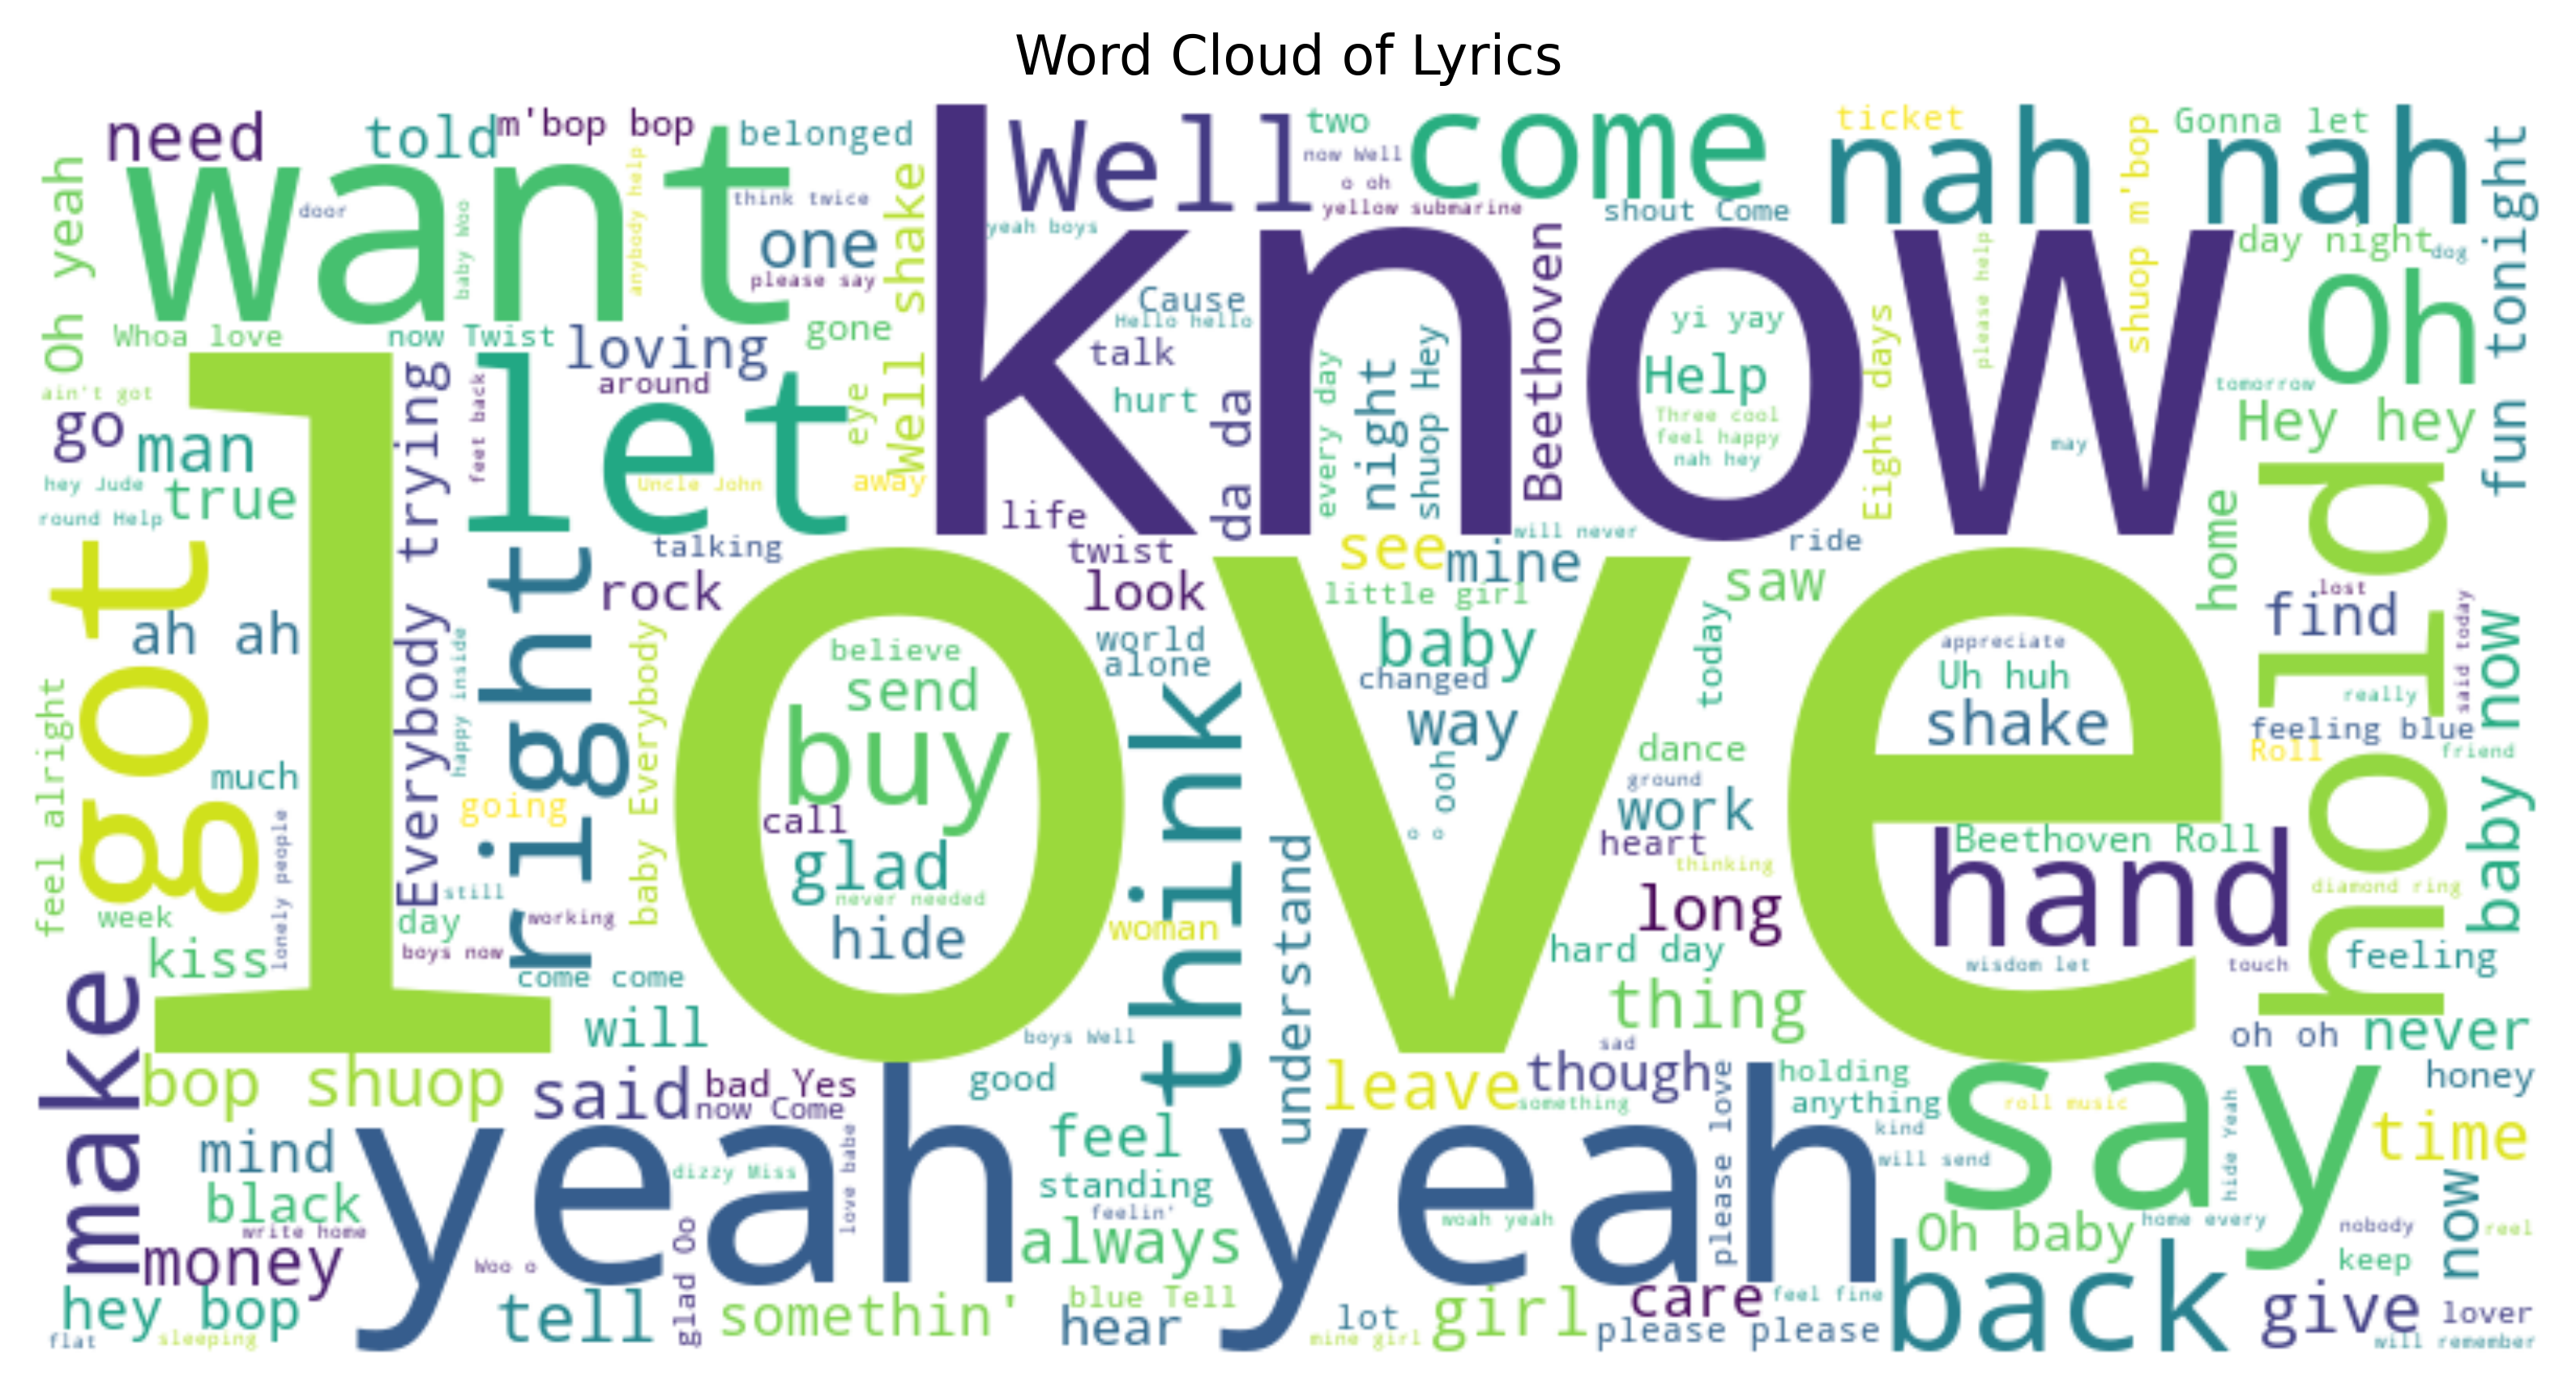

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combining all lyrics into a single string
all_lyrics = ' '.join([song['lyrics'] for song in songs])

# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

# Titles and labes
plt.figure(figsize=(10, 6), dpi=400)

plt.imshow(wordcloud, interpolation='bilinear')

plt.title('Word Cloud of Lyrics')

plt.axis('off')

plt.show()

#### Comment:
Words like "love," "know," "want," and "come" highlight their focus on emotions and relationships. Musical references like "rock," "roll," and "Twist" showcase their roots in rock and roll.  Interestingly, "time," "today," and "now" hint at their exploration of temporal themes,  while "believe" and "true" suggest their use of language to convey affirmation and sincerity. Overall, the word cloud offers a compelling snapshot of The Beatles' lyrical universe, emphasizing love, music, and the enduring power of their message.